In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

In questa lezione, vedremo come usare diversi tipi di regressore per stimare i valori esatti di un polinomio non lineare.

## Generazione dei dati

Innanzitutto, creiamo un polinomio a partire da una forma d'onda sinusoidale. Aggiungiamo, ogni 20 elementi, un (rilevante) contributo di rumore casuale.

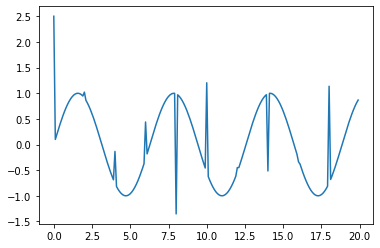

In [2]:
X = np.arange(0, 20, .1).reshape(-1, 1)
y = np.sin(X)
y[::20] += np.random.normal(0, 1, y.shape)[::20]
y = y.ravel()

plt.plot(X, y)
plt.show()

## Impatto della scelta degli iperparametri

Per la nostra stima di regressione, useremo due alberi decisionali, che si differenzieranno esclusivamente per un aspetto, ovvero la scelta del parametro `max_depth`. Nel primo albero, il parametro sarà lasciato al valore di default, per cui non avremo una massima profondità vera e propria; nel secondo, il parametro sarà impostato a 2.

In [3]:
rgr_mdl = DecisionTreeRegressor(max_depth=2)
rgr = DecisionTreeRegressor()
rgr.fit(X, y)
rgr_mdl.fit(X, y)

DecisionTreeRegressor(max_depth=2)

Effettuiamo una predizione su dei valori di test, e vediamo quali risultati sono restituiti da entrambi i regressori nella figura sottostante.

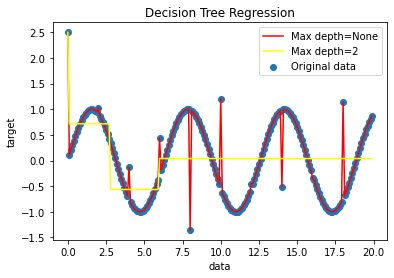

In [4]:
y_pred_mdl = rgr_mdl.predict(X)
y_pred = rgr.predict(X)

fig, ax = plt.subplots()

ax.scatter(X, y, label='Original data')
ax.plot(X, y_pred, color='red', label='Max depth=None')
ax.plot(X, y_pred_mdl, color='yellow', label='Max depth=2')
ax.set_xlabel("data")
ax.set_ylabel("target")
ax.set_title("Decision Tree Regression")
ax.legend()

plt.show()

Notiamo come il parametro `max_depth` abbia comportato, nel caso di `max_depth=2`, una riduzione molto forte delle performance del regressore; ciò non è invece avvenuto lasciando detto parametro al suo valore di default, ovvero `None`. Verifichiamo questo aspetto con il MAPE.

In [5]:
print('MAPE per max_depth=None: \t {}'.format(mean_absolute_percentage_error(y, y_pred)))
print('MAPE per max_depth=2: \t\t {}'.format(
    round(mean_absolute_percentage_error(y, y_pred_mdl), 2)))

MAPE per max_depth=None: 	 0.0
MAPE per max_depth=2: 		 1.04


## Esercizio 1

Il valore di `0.0`, seppur desiderabile, deve in realtà farci sospettare che, in qualche modo, si sia condizionato l'esperimento. Per avere una descrizione più realistica delle performance del nostro regressore, è opportuno usare anche in questo caso la $k$-fold validation. In particolare, vediamo cosa succede con il regressore "ottimale", quello con `max_depth=None`.

Per specificare la funzione di scoring, usiamo il parametro `scoring` con valore `neg_mean_absolute_percentage_error`.

In [6]:
def print_scores(cross_val_function):
    scores = cross_val_function
    print('Il valore medio di MAPE è {}, con una deviazione standard di {}'.format(
        abs(round(scores.mean(), 3)), 
        round(scores.std(), 3)))

print_scores(cross_val_score(rgr, X, y, scoring='neg_mean_absolute_percentage_error', cv=10))

Il valore medio di MAPE è 2.431, con una deviazione standard di 1.521


## Esercizio 2

Proviamo ad utilizzare un altro tipo di regressore, ovvero il `RandomForestRegressor`. Lasciamo, anche in questo caso, i valori di default.

In [7]:
rgr = RandomForestRegressor()
rgr.fit(X, y)
rgr.predict(X)

print_scores(cross_val_score(rgr, X, y, scoring='neg_mean_absolute_percentage_error', cv=10))

Il valore medio di MAPE è 2.07, con una deviazione standard di 1.173


Come è possibile notare, anche in questo caso l'uso di un `RandomForestRegressor` migliora sensi